# Projekt 2 - indywidualny

## Przegląd Barberów w Gliwicach

### Wojciech Pragłowski

#### Dane zescrapowane ze strony [booksy.](https://booksy.com/pl-pl/s/barber-shop/12795_gliwice)

In [1]:
import requests
from bs4 import BeautifulSoup


booksy = requests.get("https://booksy.com/pl-pl/s/barber-shop/12795_gliwice")
soup = BeautifulSoup(booksy.content, 'html.parser')


barber = soup.find_all('h2')
text_barber = [i.get_text() for i in barber]
barber_names = [i.strip() for i in text_barber]
barber_names.pop(-1)

rate = soup.find_all('div', attrs={'data-testid':'rank-average'})
text_rate = [i.get_text() for i in rate]
barber_rate = [i.strip() for i in text_rate]

opinions = soup.find_all('div', attrs={'data-testid':'rank-label'})
text_opinions = [i.get_text() for i in opinions]
replace_opinions = [i.replace('opinii', '') for i in text_opinions]
replace_opinions2 = [i.replace('opinie', '') for i in replace_opinions]
strip_opinions = [i.strip() for i in replace_opinions2]
barber_opinions = [int(i) for i in strip_opinions]

prices = soup.find_all('div', attrs={'data-testid':'service-price'})
text_prices = [i.get_text() for i in prices]
replace_prices = [i.replace('zł', '') for i in text_prices]
replace_prices2 = [i.replace(',', '.') for i in replace_prices]
replace_prices3 = [i.replace('+', '') for i in replace_prices2]
replace_null = [i.replace('Bezpłatna', '0') for i in replace_prices3]
replace_space = [i.replace(' ', '') for i in replace_null]
strip_prices = [i.strip() for i in replace_space]
barber_prices = [float(i) for i in strip_prices]

In [2]:
import pandas as pd

barbers = pd.DataFrame(barber_names, columns=["Barber's name"])
barbers["Barber's rate"] = barber_rate
barbers["Barber's opinions"] = barber_opinions

barbers

,Barber's name,Barber's rate,Barber's opinions
0,The POPE Barber SHOP,"5,0",2047
1,Matt BarberShop,"4,9",629
2,Sick Boy Barbershop,"5,0",1141
3,Gentleman Barber Gliwice,"4,9",375
4,Freak Head,"5,0",649
5,WILKOSZ Fryzjerstwo Męskie Barber Shop,"4,9",511
6,VIKING BarberShop&Piercing,"5,0",87
7,Majlo Barber Shop,"5,0",176
8,Lucjan's Barber Shop,"5,0",172
9,Wojnarowska Hair_style,"4,9",567


In [3]:
# znalezienie wiarygodnych barberów, czyli takich, którzy mają opinii > 500
best_opinions = [i for i in barber_opinions if i > 500]
best_indexes = []

for amount in barber_opinions:
    if amount in best_opinions:
        best_indexes.append(barber_opinions.index(amount))

best_barbers = [barber_names[i] for i in best_indexes]
best_rates = [barber_rate[i] for i in best_indexes]

In [4]:
# połączenie 3 cen dla jednego barbera
combined_prices = [barber_prices[i:i+3] for i in range(0, len(barber_prices), 3)]

best_prices = [combined_prices[i] for i in best_indexes]
print(best_prices)

[[80.0, 30.0, 125.0], [90.0, 50.0, 65.0], [60.0, 50.0, 50.0], [120.0, 50.0, 40.0], [50.0, 40.0, 40.0], [70.0, 100.0, 0.0], [800.0, 1500.0, 69.0]]


In [5]:
avg = [sum(i)/len(i) for i in best_prices]
avg_price = [round(i,2) for i in avg]
avg_price

[78.33, 68.33, 53.33, 70.0, 43.33, 56.67, 789.67]

In [6]:
df_best_barber = pd.DataFrame(best_barbers, columns=["Barber's name"])
df_best_barber["Amount of opinions"] = best_opinions
df_best_barber["Barber's rate"] = best_rates
df_best_barber["Average Barber's prices"] = avg_price
df_best_barber

,Barber's name,Amount of opinions,Barber's rate,Average Barber's prices
0,The POPE Barber SHOP,2047,"5,0",78.33
1,Matt BarberShop,629,"4,9",68.33
2,Sick Boy Barbershop,1141,"5,0",53.33
3,Freak Head,649,"5,0",70.00
4,WILKOSZ Fryzjerstwo Męskie Barber Shop,511,"4,9",43.33
5,Wojnarowska Hair_style,567,"4,9",56.67
6,Trendy Hair Fashion & Victoria Day Spa,894,"4,9",789.67


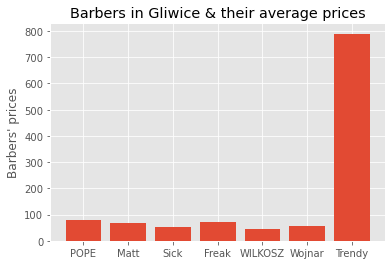

In [7]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
x = ['POPE', 'Matt', 'Sick', 'Freak', 'WILKOSZ', 'Wojnar', 'Trendy']
y = avg_price

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, y)
plt.ylabel("Barbers' prices")
plt.title("Barbers in Gliwice & their average prices")

plt.xticks(x_pos, x)
plt.show()

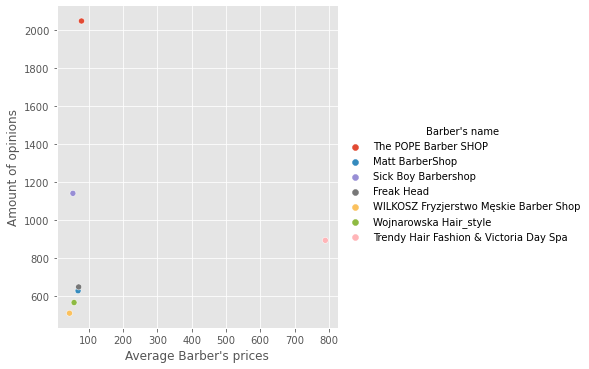

In [8]:
import seaborn as sns

sns.relplot(x = "Average Barber's prices", y = "Amount of opinions", hue="Barber's name", data = df_best_barber)